<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [31]:
!pip install seaborn pandas numpy scikit-learn matplotlib sklearn_evaluation

In [32]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot
from sklearn.model_selection import train_test_split



## Function

In [34]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [ ]:
# importation du dataset
data = load_breast_cancer()

In [36]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [52]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [53]:
features_name = [name.replace(" ", "_") for name in data.feature_names]
df.columns= features_name+['target']

In [54]:
features_name
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [55]:
#type de colonne
df.dtypes

mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity            float64
worst_concave_points       float64
worst_symmetry      

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [ ]:
#stat descriptive
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: >

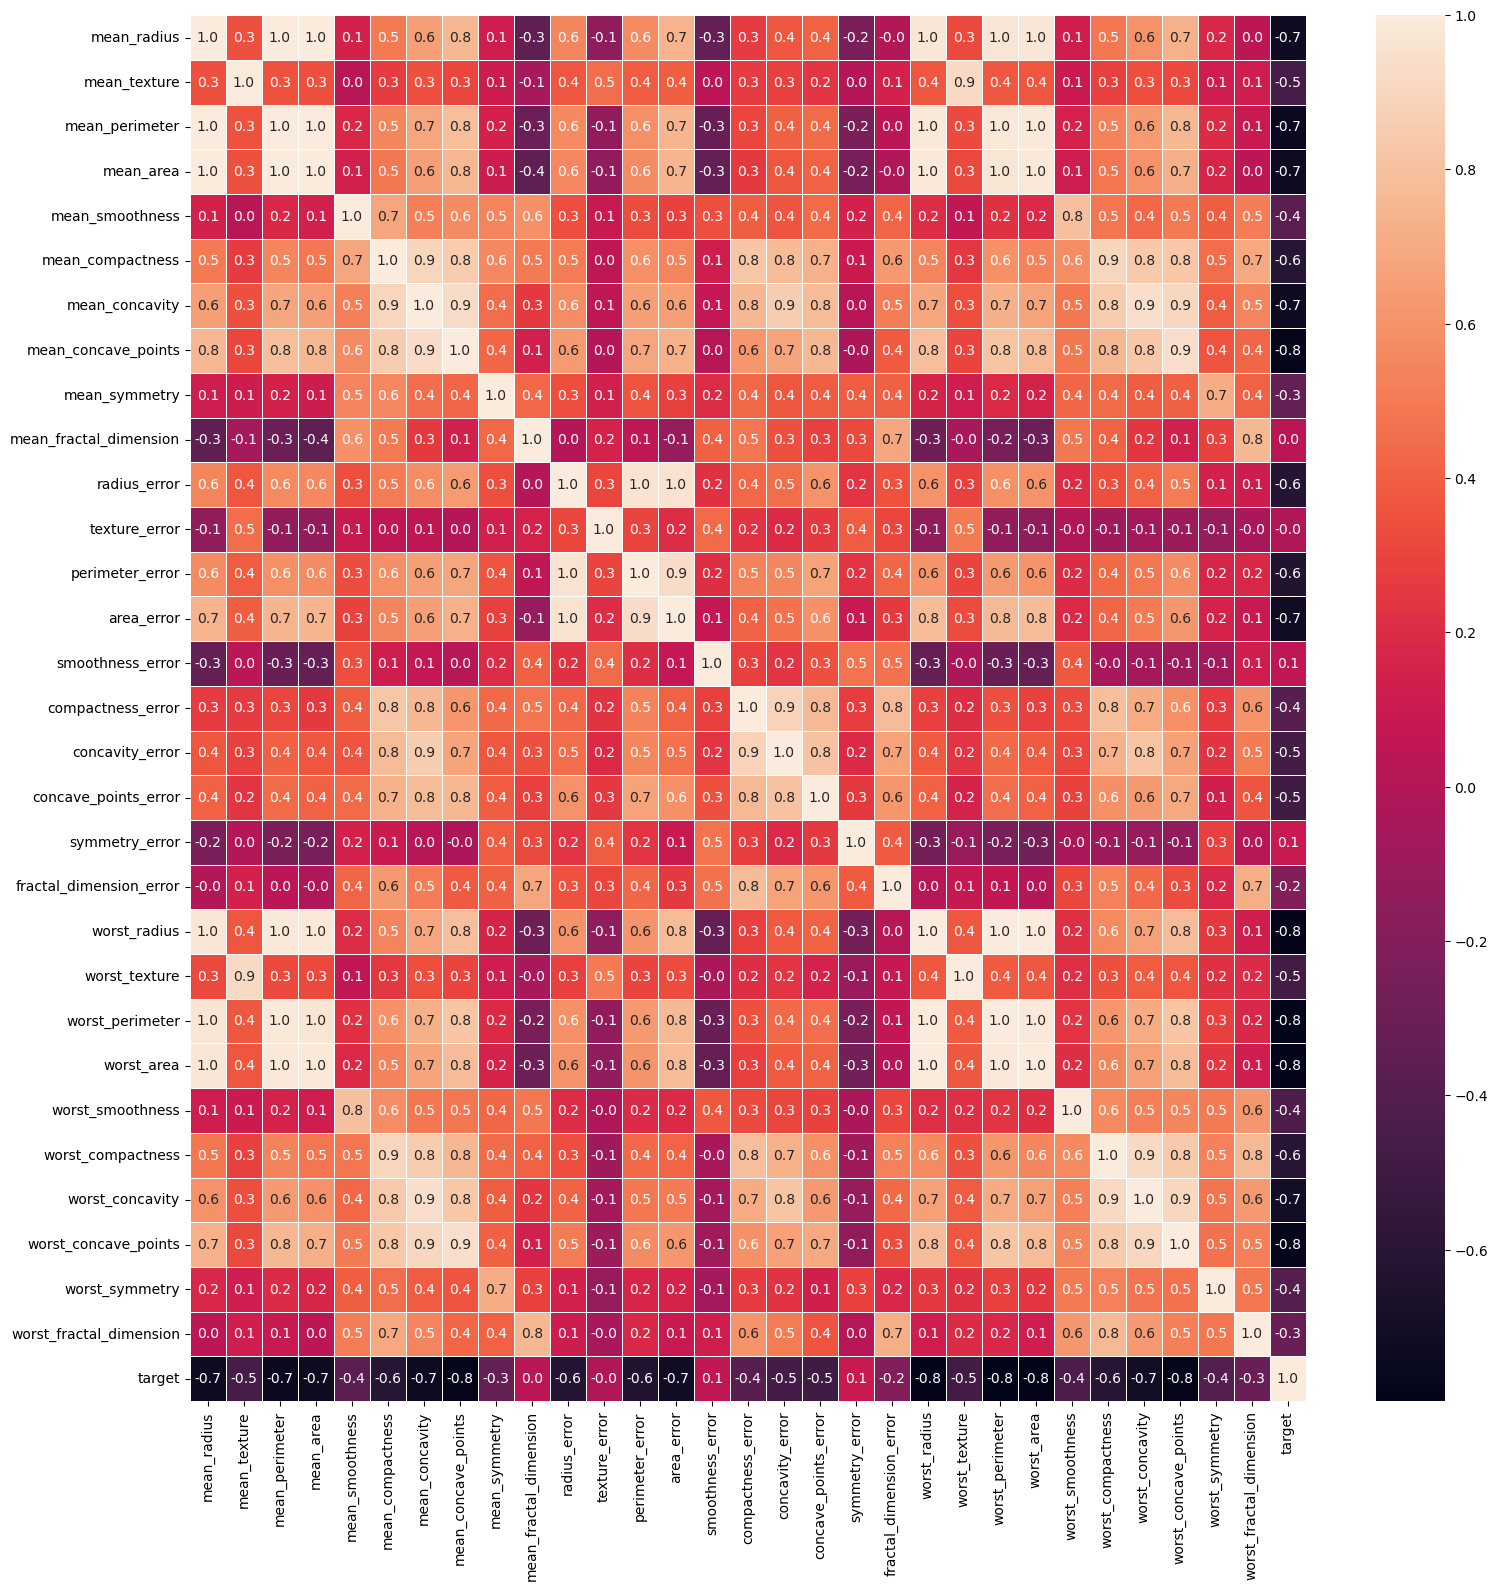

In [58]:
#correlation 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#voir si supprimer les variables tres correlees

In [65]:
#Valeur manquante
print(df.isnull().sum() / len(df) * 100)

mean_radius                0.0
mean_texture               0.0
mean_perimeter             0.0
mean_area                  0.0
mean_smoothness            0.0
mean_compactness           0.0
mean_concavity             0.0
mean_concave_points        0.0
mean_symmetry              0.0
mean_fractal_dimension     0.0
radius_error               0.0
texture_error              0.0
perimeter_error            0.0
area_error                 0.0
smoothness_error           0.0
compactness_error          0.0
concavity_error            0.0
concave_points_error       0.0
symmetry_error             0.0
fractal_dimension_error    0.0
worst_radius               0.0
worst_texture              0.0
worst_perimeter            0.0
worst_area                 0.0
worst_smoothness           0.0
worst_compactness          0.0
worst_concavity            0.0
worst_concave_points       0.0
worst_symmetry             0.0
worst_fractal_dimension    0.0
target                     0.0
dtype: float64


#pas de valeur manquantes parfait

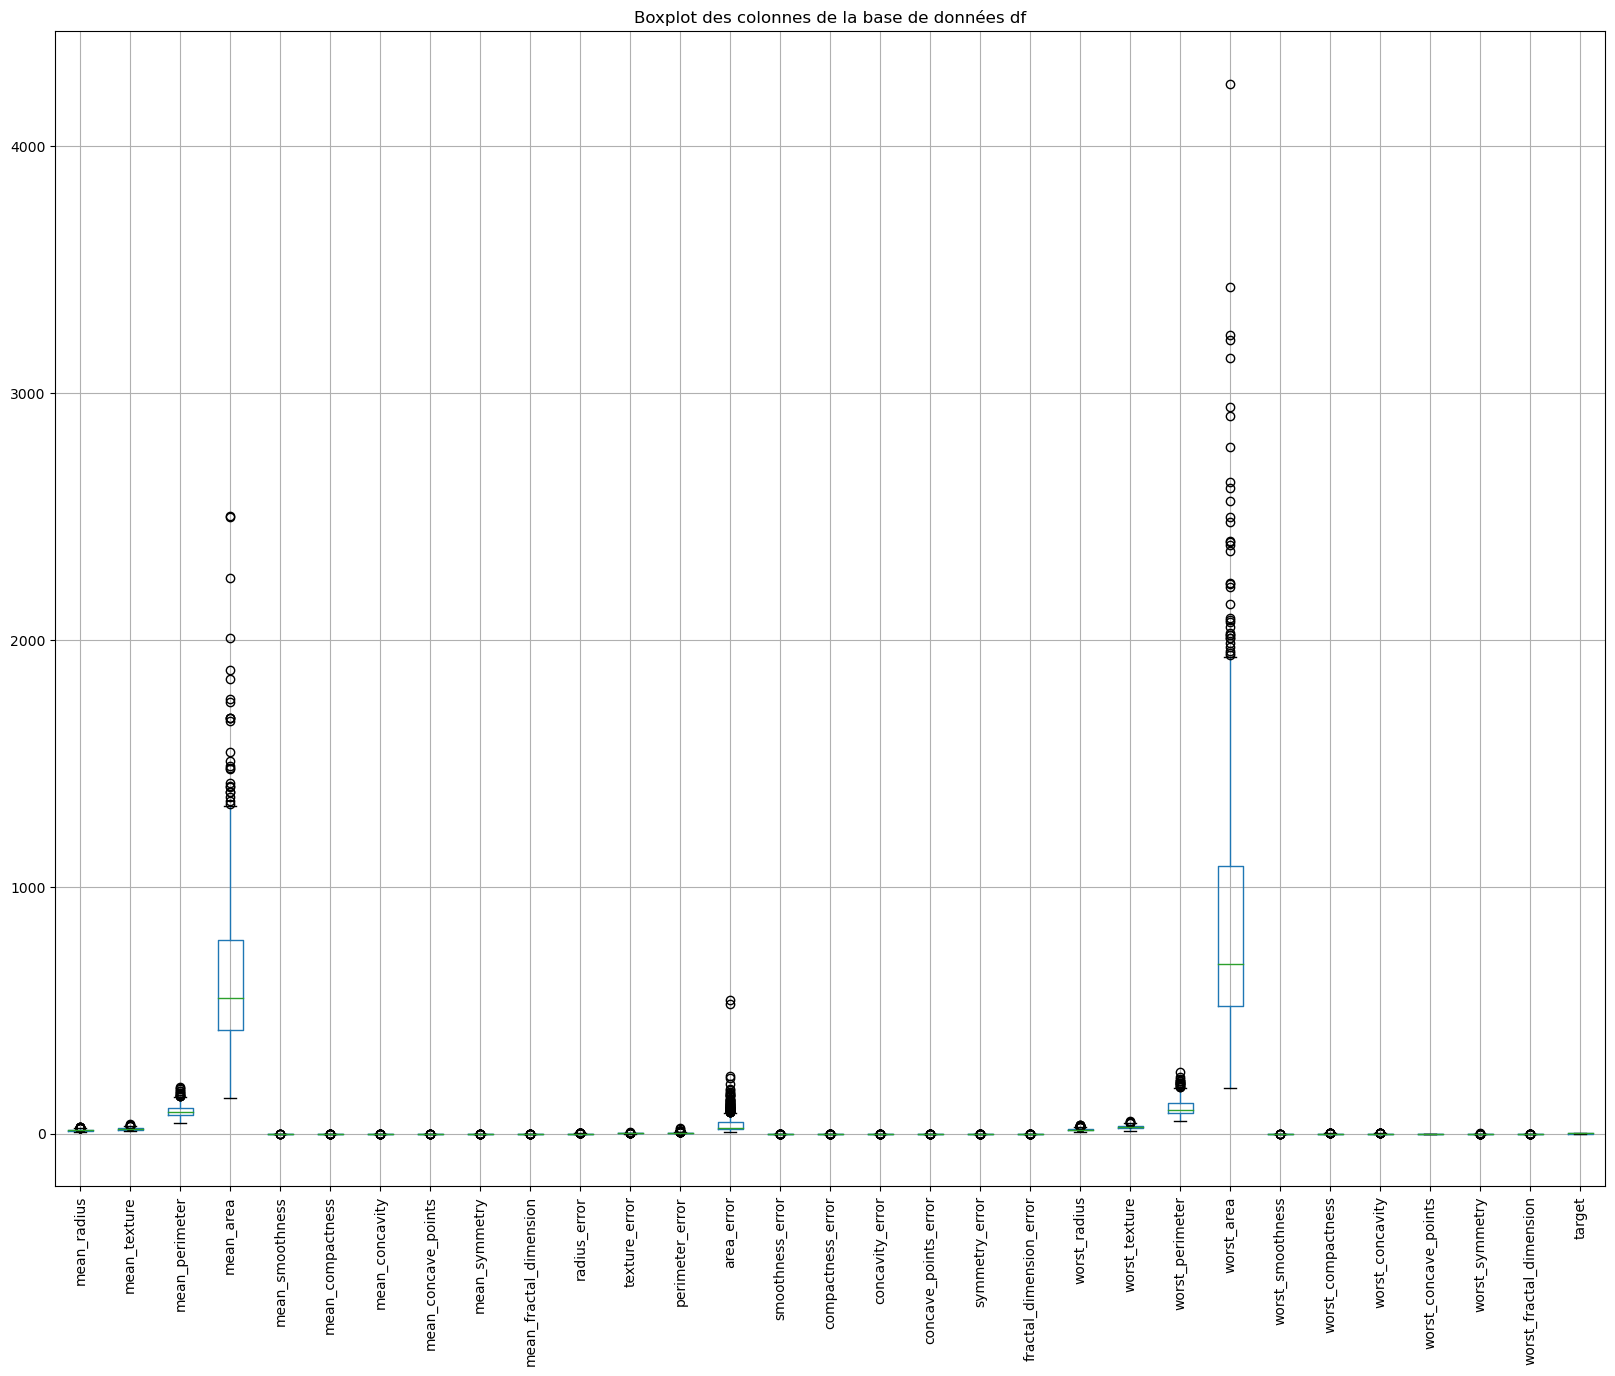

In [68]:
# Créer des boxplots pour toutes les colonnes de la base de données df
plt.figure(figsize=(20, 15))
df.boxplot(rot=90)
plt.title("Boxplot des colonnes de la base de données df")
plt.xticks(rotation=90)
plt.show()

#ce sont des donnée médicale donc on ne va pas supprimer les valeurs aberrante

2) statistique bivariés

In [ ]:
## si il y a des corrélation tres proche de 1 ou -1 on peut les supprimer, puisque l'information transmet la même chose


In [71]:
from sklearn.preprocessing import StandardScaler
# StandardScaler
scaler = StandardScaler()
# On applique la standardisation sur toutes les colonnes numériques
df_s= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_s.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676


#### 3) Recoder les variables si nécessaire


In [74]:
df_s['target'] = df_s.target.astype('int32')

In [75]:
features_name

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [83]:
# Calculer la matrice de corrélation
corr_matrix = df_s.corr().abs()

# Sélectionner les colonnes avec des corrélations supérieures à 0.85
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Supprimer les colonnes sélectionnées
df_s.drop(columns=to_drop, inplace=True)

# Afficher les colonnes restantes
print(df_s.columns)

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness',
       'mean_symmetry', 'mean_fractal_dimension', 'radius_error',
       'texture_error', 'smoothness_error', 'compactness_error',
       'concavity_error', 'concave_points_error', 'symmetry_error',
       'fractal_dimension_error', 'worst_smoothness', 'worst_symmetry',
       'worst_fractal_dimension', 'target'],
      dtype='object')


In [84]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_smoothness          569 non-null    float64
 3   mean_compactness         569 non-null    float64
 4   mean_symmetry            569 non-null    float64
 5   mean_fractal_dimension   569 non-null    float64
 6   radius_error             569 non-null    float64
 7   texture_error            569 non-null    float64
 8   smoothness_error         569 non-null    float64
 9   compactness_error        569 non-null    float64
 10  concavity_error          569 non-null    float64
 11  concave_points_error     569 non-null    float64
 12  symmetry_error           569 non-null    float64
 13  fractal_dimension_error  569 non-null    float64
 14  worst_smoothness         5

In [85]:
# Sélectionner deux features pour l'exemple
X = df[['mean_radius', 'mean_texture']]  
y = df['target']

In [86]:
# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [87]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC


In [88]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
#lgr.fit(X_train_sc, y_train)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
#l_SVC.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)


#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)

NameError: name 'LinearSVC' is not defined

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

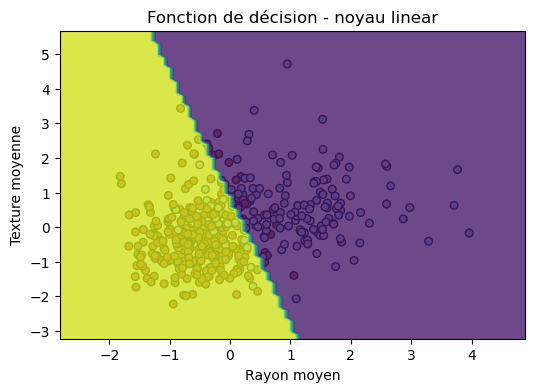

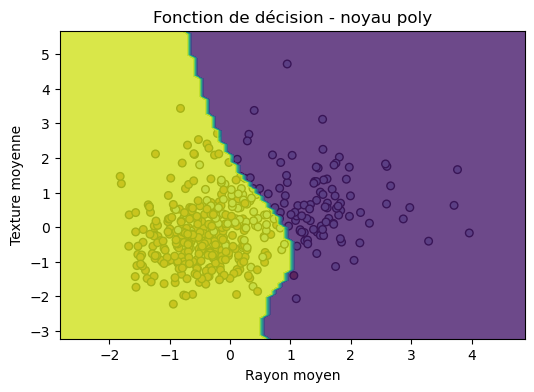

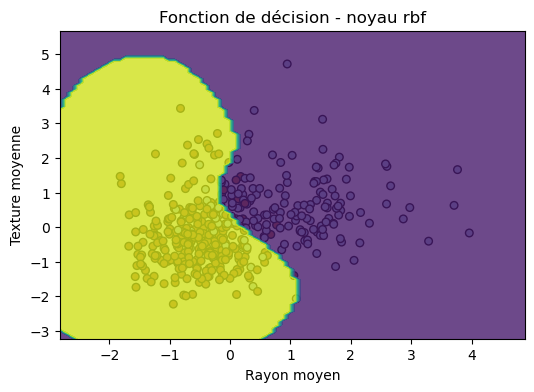

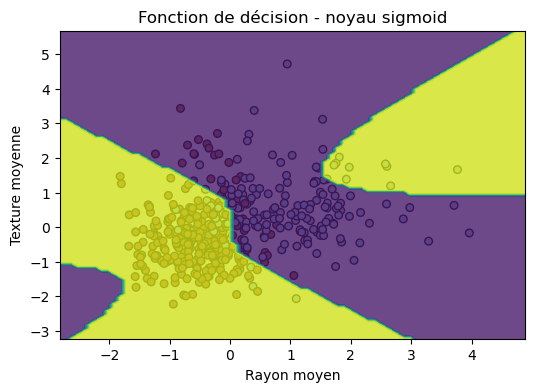

In [90]:
#SVC
# Essayer plusieurs noyaux pour SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc_clf = SVC(kernel=kernel, random_state=42)
    svc_clf.fit(X_train, y_train)
    
    # Affichage de la fonction de décision (plot)
    plt.figure(figsize=(6, 4))
    plt.title(f"Fonction de décision - noyau {kernel}")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, edgecolors='k')
    
    # Tracer la frontière de décision
    ax = plt.gca()
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    plt.xlabel('Rayon moyen')
    plt.ylabel('Texture moyenne')
    plt.show()

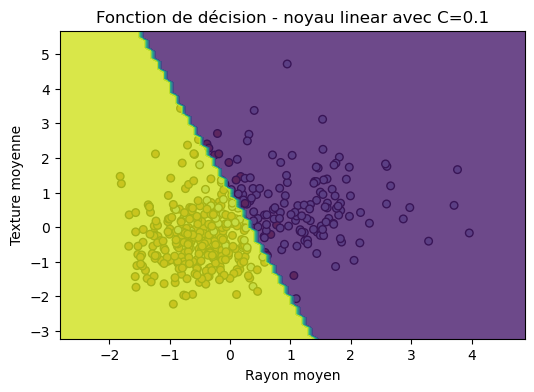

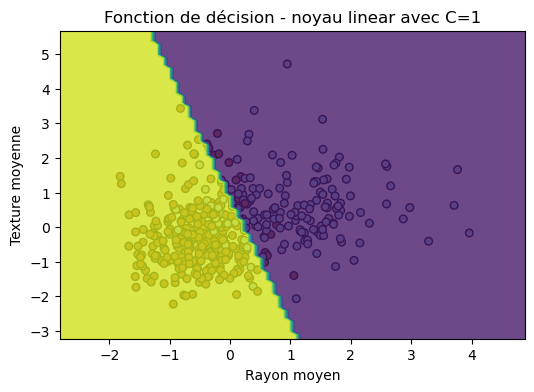

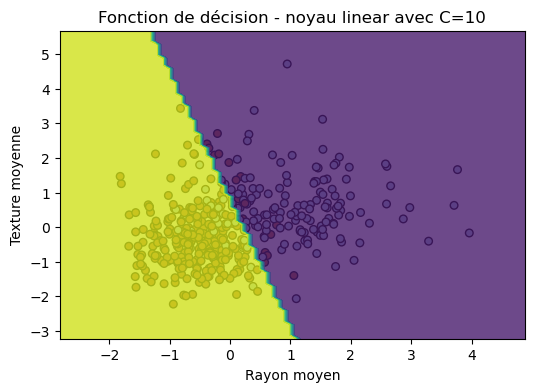

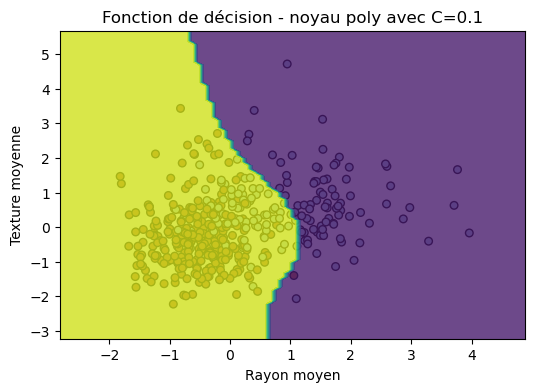

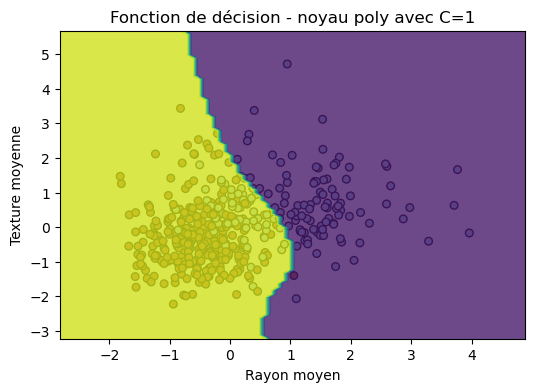

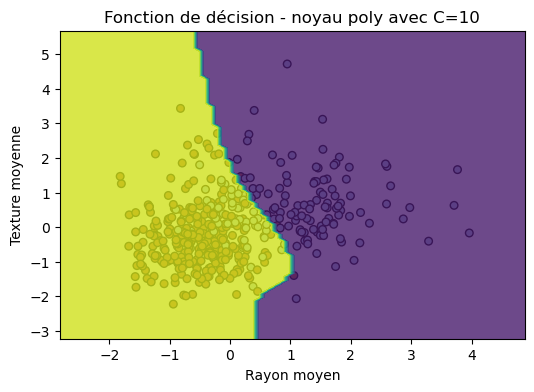

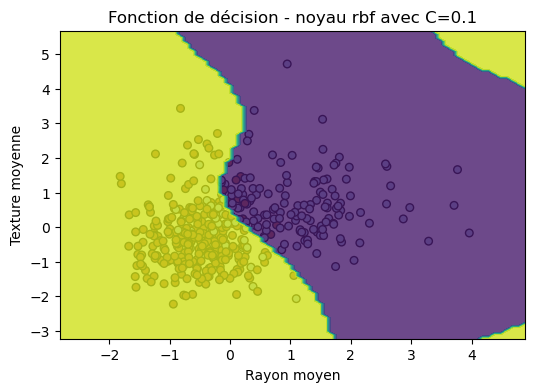

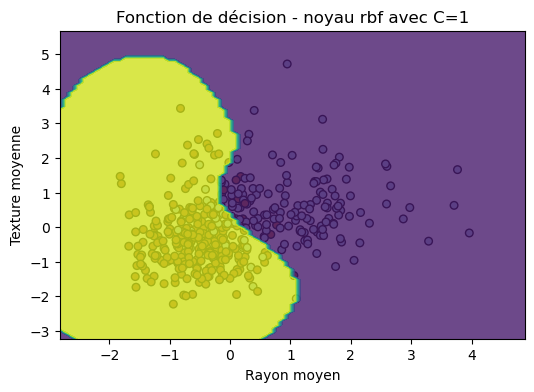

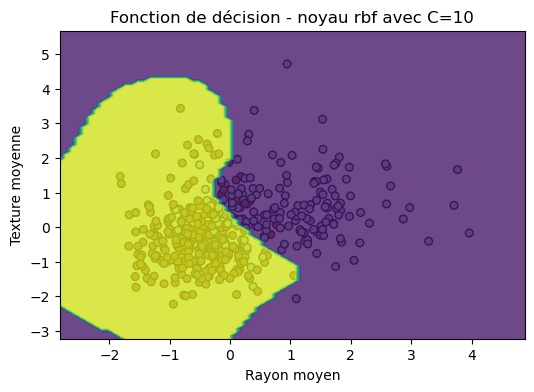

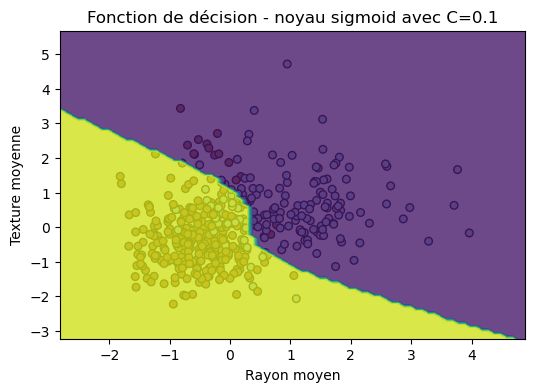

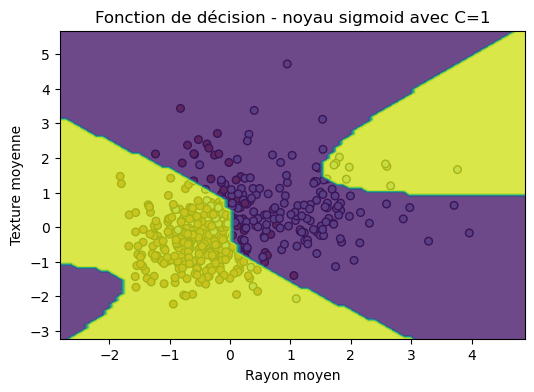

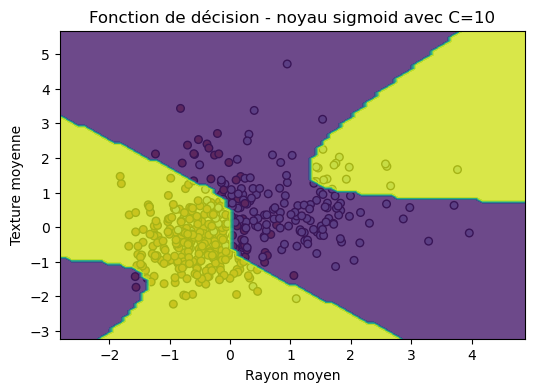

In [91]:
# Essayer plusieurs noyaux pour SVC et visualiser la fonction de décision
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]  # différente valeur de c(coefficients de régularisation)

for kernel in kernels:
    for C in C_values:
        svc_clf = SVC(kernel=kernel, C=C, random_state=42)
        svc_clf.fit(X_train, y_train)
        
        # Affichage de la fonction de décision (plot)
        plt.figure(figsize=(6, 4))
        plt.title(f"Fonction de décision - noyau {kernel} avec C={C}")
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, edgecolors='k')
        
        # Tracer la frontière de décision
        ax = plt.gca()
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        Z = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8)
        plt.xlabel('Rayon moyen')
        plt.ylabel('Texture moyenne')
        plt.show()

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [ ]:
# definir le modele
models = {
    'SGDClassifier': SGDClassifier(random_state=42),
    'SVC_linear': SVC(kernel='linear', random_state=42),
    'SVC_poly': SVC(kernel='poly', random_state=42),
    'SVC_rbf': SVC(kernel='rbf', random_state=42),
    'SVC_sigmoid': SVC(kernel='sigmoid', random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# evaluer le modele
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("\n")

Model: SGDClassifier
Accuracy: 0.8771929824561403
Confusion Matrix:
[[39  4]
 [10 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        43
           1       0.94      0.86      0.90        71

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



Model: SVC_linear
Accuracy: 0.9035087719298246
Confusion Matrix:
[[36  7]
 [ 4 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



Model: SVC_poly
Accuracy: 0.8245614035087719
Confusion Matrix:
[[25 18]
 [ 2 69]]
Classification Report:
              precis

In [95]:
class_svc = SVC(C=0.1, random_state=42 , kernel='rbf', gamma=0.2)
class_svc.fit(X_train, y_train)
print('Accuray train : ' + str(accuracy_score(y_train, class_svc.predict(X_train))))
print('Accuray test : ' + str(accuracy_score(y_test, class_svc.predict(X_test))))

Accuray train : 0.8967032967032967
Accuray test : 0.8947368421052632


In [96]:
class_svc = SVC(C=1, random_state=42 , kernel='poly', degree=1)
class_svc.fit(X_train, y_train)
print('Accuray train : ' + str(accuracy_score(y_train, class_svc.predict(X_train))))
print('Accuray test : ' + str(accuracy_score(y_test, class_svc.predict(X_test))))

Accuray train : 0.8857142857142857
Accuray test : 0.8947368421052632


#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [ ]:
# cross_validation pour chaque modèle
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Model: {name}")
    print(f"Cross-validation accuracy scores: {scores}")
    print(f"Mean cross-validation accuracy: {scores.mean()}")
    print("\n")

Model: SGDClassifier
Cross-validation accuracy scores: [0.85714286 0.79120879 0.91208791 0.83516484 0.81318681]
Mean cross-validation accuracy: 0.8417582417582418


Model: SVC_linear
Cross-validation accuracy scores: [0.89010989 0.87912088 0.93406593 0.85714286 0.85714286]
Mean cross-validation accuracy: 0.8835164835164836


Model: SVC_poly
Cross-validation accuracy scores: [0.83516484 0.79120879 0.93406593 0.79120879 0.82417582]
Mean cross-validation accuracy: 0.8351648351648351


Model: SVC_rbf
Cross-validation accuracy scores: [0.85714286 0.92307692 0.95604396 0.89010989 0.86813187]
Mean cross-validation accuracy: 0.8989010989010989


Model: SVC_sigmoid
Cross-validation accuracy scores: [0.84615385 0.9010989  0.84615385 0.81318681 0.8021978 ]
Mean cross-validation accuracy: 0.8417582417582418


Model: LogisticRegression
Cross-validation accuracy scores: [0.9010989  0.89010989 0.92307692 0.85714286 0.84615385]
Mean cross-validation accuracy: 0.8835164835164836




#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# évaluation
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Model: SGDClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        43
           1       0.94      0.86      0.90        71

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114

Confusion Matrix:
[[39  4]
 [10 61]]


Model: SVC_linear
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

Confusion Matrix:
[[36  7]
 [ 4 67]]


Model: SVC_poly
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.58      0.71        43
           1       0.79      0.97  

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [99]:
#Tuning three kernels
params = [
    {"kernel": ["rbf"], "gamma": [0.01, 0.1,0.5,1,2], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree":[1,2,3,4],"C": [1, 10, 100, 1000]},
    {"kernel": ["linear"],"C": [1, 10, 100, 1000]}
]

c_svc = SVC(random_state=42)

grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)

In [100]:
take_grid = grid_c_svc.fit(X_train, y_train)

In [101]:
#On garde le meilleur modèle et on refait un grid search uniquement sur ce modèle
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleur combinaison d'estimateur est: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
pour un score de: 0.9010989010989011


In [102]:
#Examiner tous les fold par ordre
results_df = pd.DataFrame(take_grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(results_df["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                 ).rename_axis("kernel")

results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_0.1_rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",1,0.901099,0.031082
1000_0.1_rbf,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",1,0.901099,0.034750
100_0.1_rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",1,0.901099,0.033331
1_0.5_rbf,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",4,0.896703,0.033040
1_1_rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",4,0.896703,0.038446
1_0.1_rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",6,0.894505,0.022628
10_0.5_rbf,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",6,0.894505,0.040881
1000_0.01_rbf,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",6,0.894505,0.030769
1_2_rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",9,0.890110,0.030295


In [104]:
#Tuning two kernel
params = [
    {"kernel": ["rbf"], "gamma": [0.001,0.005,0.01], "C": [1, 10]},
    {"kernel": ["poly"], "degree":[1],"C": [1, 10]},
    {"kernel": ["linear"],"C": [1, 10]}
]

c_svc = SVC(random_state=42)

grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)
take_grid = grid_c_svc.fit(X_train, y_train)

In [105]:
results_df = pd.DataFrame(take_grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(results_df["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                 ).rename_axis("kernel")

results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_0.01_rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",1,0.887912,0.030612
1_1_poly,"{'C': 1, 'degree': 1, 'kernel': 'poly'}",2,0.885714,0.029157
10_1_poly,"{'C': 10, 'degree': 1, 'kernel': 'poly'}",3,0.883516,0.024670
1_linear,"{'C': 1, 'kernel': 'linear'}",3,0.883516,0.028317
10_0.005_rbf,"{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}",5,0.881319,0.027274
10_linear,"{'C': 10, 'kernel': 'linear'}",5,0.881319,0.024474
1_0.01_rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",7,0.868132,0.034750
10_0.001_rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",8,0.863736,0.037168
1_0.005_rbf,"{'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}",9,0.854945,0.035027


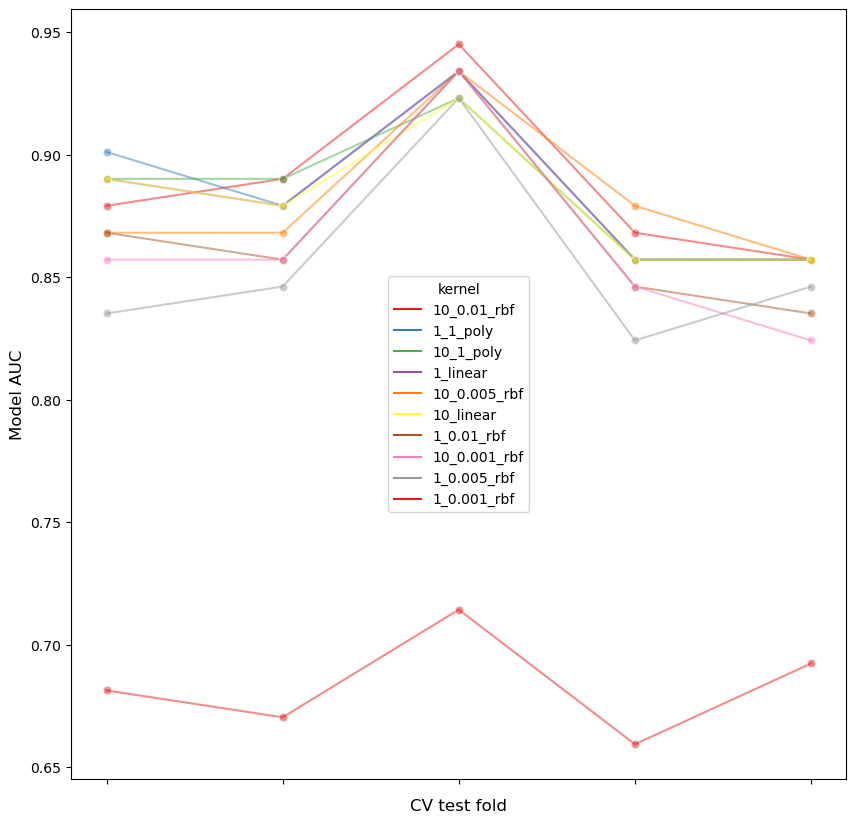

In [106]:
# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores

fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()


#le meilleur modèle : 10_0.01_rbd , C=10 , kernel : rbf

In [107]:
best_model = SVC(random_state=42, C=10, kernel='rbf',gamma=0.01)

In [108]:
best_model.fit(X_train, y_train)

SVC(C=10, gamma=0.01, random_state=42)

<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 300x200 with 0 Axes>

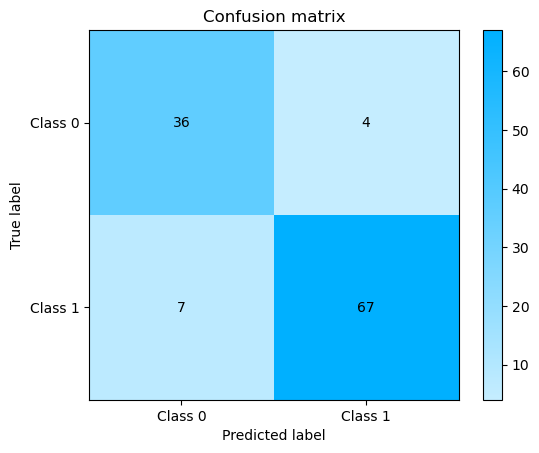

In [109]:
plt.figure(figsize=(3,2))
plot.confusion_matrix(best_model.predict(X_test), y_test)

In [110]:
print('Training score: ' + str(best_model.score(X_train,y_train)), 
      '\n',
      'Test score: ' + str(best_model.score(X_test, y_test))
     )
 
    

Training score: 0.8923076923076924 
 Test score: 0.9035087719298246


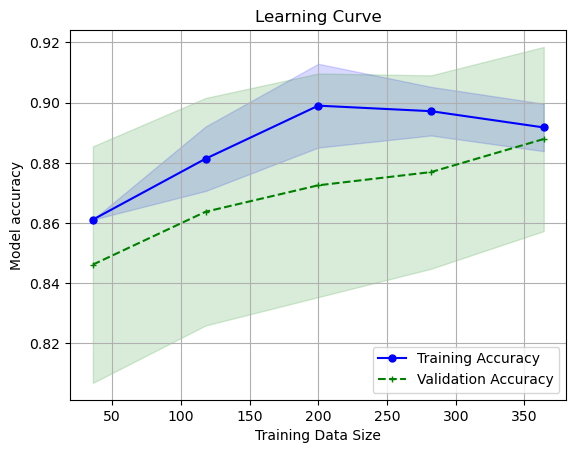

In [111]:
train_sizes, train_scores, test_scores = learning_curve(estimator=best_model, 
                                                        X=X_train, 
                                                        y=y_train,
                                                        cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        random_state=42
                                                       )

#
# Trop de fluctuation dans le modèle, on calcule la moyenne des métriques
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#Ce graphique montre une courbe d'apprentissage illustrant l'évolution de l'accuracy en fonction de la taille des données d'entraînement. L'accuracy du modèle sur l'entraînement est initialement élevée mais diminue légèrement à mesure que plus de données sont ajoutées, tandis que celle sur la validation augmente progressivement. 

<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>

#oui